Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2019/2020  
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 1: Regresija

*Verzija: 1.2  
Zadnji put ažurirano: 27. rujna 2019.*

(c) 2015-2019 Jan Šnajder, Domagoj Alagić 

Objavljeno: **30. rujna 2019.**  
Rok za predaju: **21. listopada 2019. u 07:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od deset zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Zadatci

### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [2]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [3]:
from sklearn.preprocessing import PolynomialFeatures

In [4]:
poly = PolynomialFeatures(degree=1, include_bias=True)
PHI = poly.fit_transform(X)
print(PHI)

[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 4.]]


### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [5]:
from numpy import linalg

In [6]:
PHI_transposed = PHI.transpose()

w = matmul(matmul(linalg.inv(matmul(PHI_transposed, PHI)), PHI_transposed), y)
print(w)

w = matmul(linalg.pinv(PHI), y)
print(w)

[2.2        0.45714286]
[2.2        0.45714286]


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

In [7]:
def h(w, x):
    return matmul(w.transpose(), x)

def E(predictions, y):
    error = 0.0
    for prediction_i, y_i in zip(predictions, y):
        error_i = y_i - prediction_i
        error += error_i * error_i
    error /= 2.0
    return error

h_list = []
print("x0\tx1\ty\th(x)")
for PHI_i, y_i in zip(PHI, y):
    h_i = h(w, PHI_i)
    h_list.append(h_i)
    print(PHI_i[0], PHI_i[1], y_i, h_i, sep="\t")

print("\nE(h|D) =", E(h_list, y))

from sklearn.metrics import mean_squared_error
sklearn_error = mean_squared_error(y_true=h_list, y_pred=y)
print("mean_squared_error(h|D) =", sklearn_error)

x0	x1	y	h(x)
1.0	0.0	4	2.1999999999999993
1.0	1.0	1	2.6571428571428566
1.0	2.0	2	3.114285714285714
1.0	4.0	5	4.0285714285714285

E(h|D) = 4.085714285714286
mean_squared_error(h|D) = 2.042857142857143


### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [8]:
print("PHI:", PHI, sep="\n")
try:
    PHI_inverse = linalg.inv(PHI)
except:
    print("Inverse of PHI could not be calculated!")

PHI_expanded = poly.fit_transform(poly.fit_transform(PHI))
print("Expanded PHI:", PHI_expanded, sep="\n")
try:
    PHI_expanded_inverse = linalg.inv(PHI_expanded)
except:
    print("Inverse of expanded PHI could not be calculated!")

PHI:
[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 4.]]
Inverse of PHI could not be calculated!
Expanded PHI:
[[1. 1. 1. 0.]
 [1. 1. 1. 1.]
 [1. 1. 1. 2.]
 [1. 1. 1. 4.]]
Inverse of expanded PHI could not be calculated!


### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Uvjerite se da su težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
reg = LinearRegression().fit(X, y)
print("Coefficients:", reg.coef_)
print("Independent term:", reg.intercept_)

predictions = reg.predict(X)
print("\nPredicted y (for X):", predictions)

print("Error =", E(predictions, y))

Coefficients: [0.45714286]
Independent term: 2.2

Predicted y (for X): [2.2        2.65714286 3.11428571 4.02857143]
Error = 4.085714285714286


### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [11]:
from numpy.random import normal

def make_labels(X, f, noise=0) :
    N = len(X)
    y = np.empty([N, 1])
    
    for i in range(N):
        y[i] = f(X[i]) + normal(scale=noise)
    
    return y

In [12]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

Text(0, 0.5, 'y')

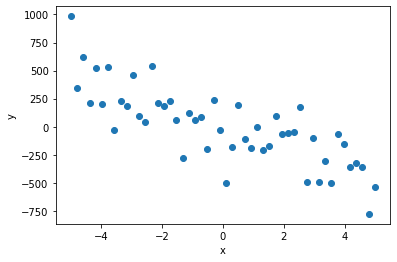

In [13]:
unknown_function = lambda x : 5 + x - 2*x**2 - 5*x**3

X = make_instances(-5, 5, 50)
y = make_labels(X, unknown_function, 200)

plt.scatter(X, y)
plt.xlabel("x")
plt.ylabel("y")

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

Error: 38298.23192914134


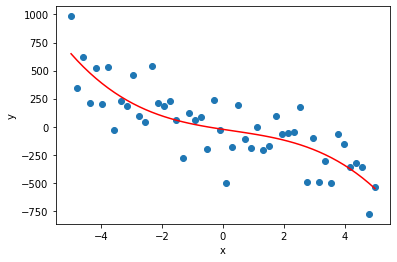

In [14]:
poly = PolynomialFeatures(3)
PHI = poly.fit_transform(X)
reg = LinearRegression().fit(PHI, y)

plt.scatter(X, y)
h = reg.predict(PHI)
plt.plot(X, h, 'r')
plt.xlabel("x")
plt.ylabel("y")

print("Error:", mean_squared_error(h, y))

### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

d	E
1	42813.74851236535
3	38298.23192914134
5	37073.1975421162
10	32525.35742312999
20	26168.823333229324


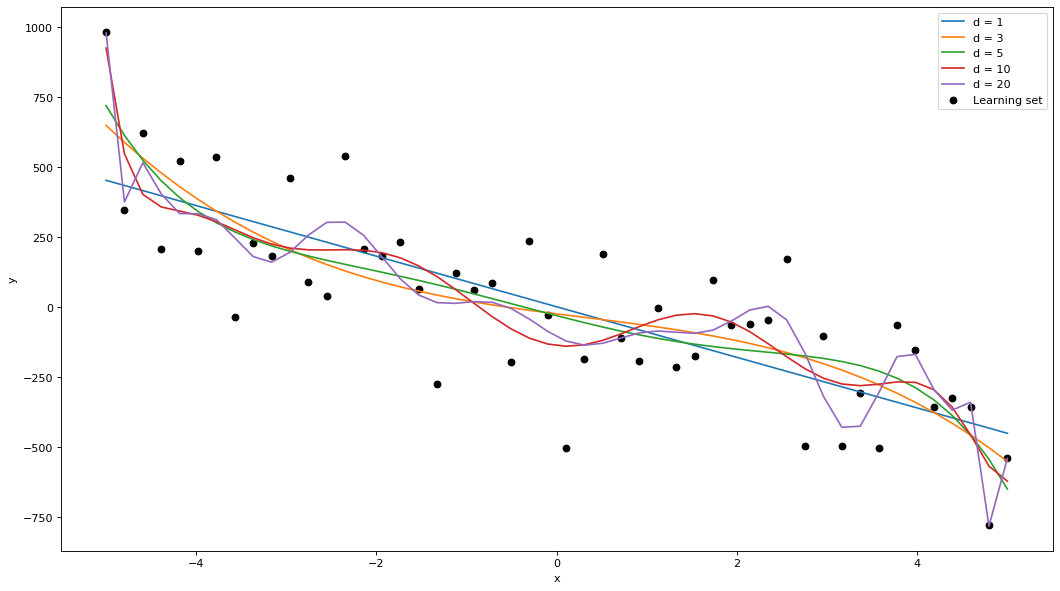

In [15]:
plt.figure(figsize=(16, 9), dpi=80)
plt.scatter(X, y, c='k', label="Learning set")

d_values = [1, 3, 5, 10, 20]

print("d\tE")
for d in d_values:
    poly = PolynomialFeatures(d)
    PHI = poly.fit_transform(X)
    
    reg = LinearRegression().fit(PHI, y)
    h = reg.predict(PHI)
    
    plt.plot(X, h, label="d = " + str(d))
    
    error = mean_squared_error(h, y)
    print(d, error, sep="\t")
    
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih pet modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

In [16]:
from sklearn.model_selection import train_test_split

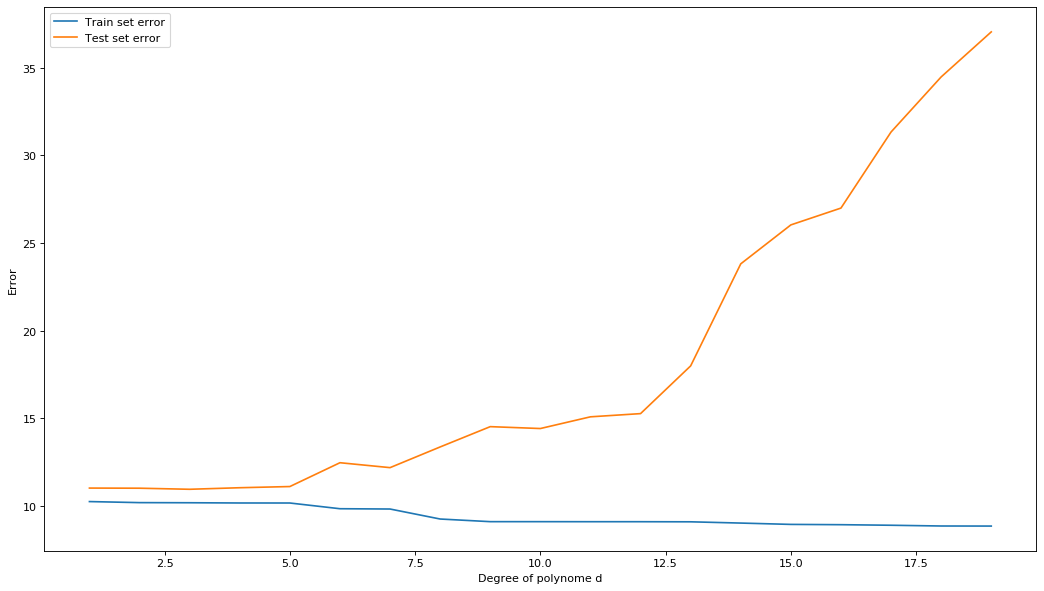

In [17]:
def calculate_train_test_errors(X_train, X_test, y_train, y_test):
    errors_train = []
    errors_test = []

    for d in d_values:
        poly = PolynomialFeatures(d)
        PHI_train = poly.fit_transform(X_train)

        reg = LinearRegression().fit(PHI_train, y_train)
        h_train = reg.predict(PHI_train)
        error_train = mean_squared_error(h_train, y_train)
        errors_train.append(math.log(error_train))

        PHI_test = poly.fit_transform(X_test)
        h_test = reg.predict(PHI_test)
        error_test = mean_squared_error(h_test, y_test)
        errors_test.append(math.log(error_test))
    
    return errors_train, errors_test

plt.figure(figsize=(16, 9), dpi=80)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
d_values = np.arange(1, 20)

errors_train, errors_test = calculate_train_test_errors(X_train, X_test, y_train, y_test)
plt.plot(d_values, errors_train, label="Train set error")
plt.plot(d_values, errors_test, label="Test set error")
plt.xlabel("Degree of polynome d")
plt.ylabel("Error")
plt.legend()

### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

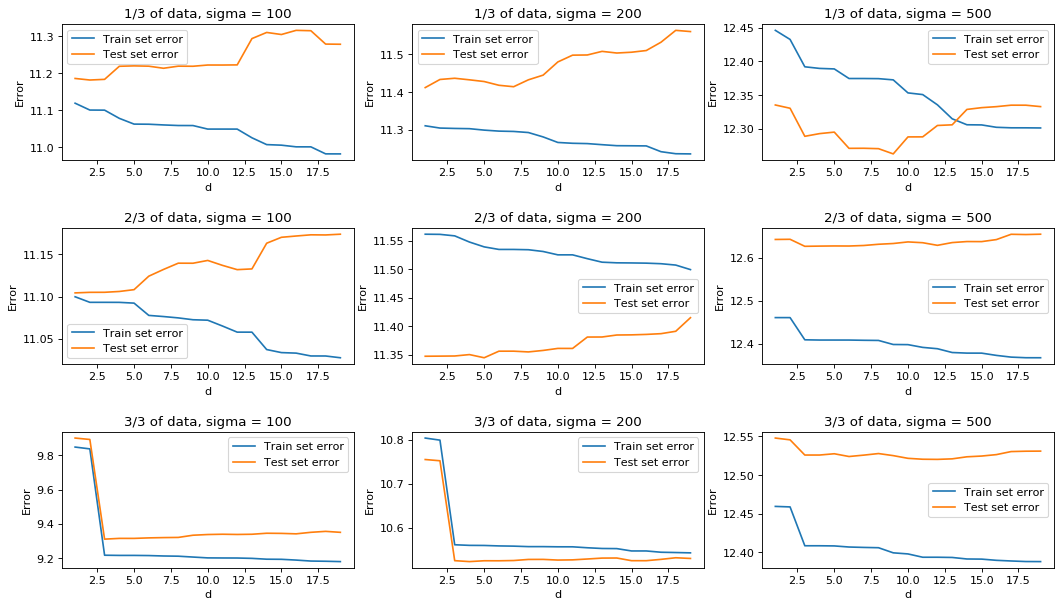

In [18]:
X = make_instances(-5, 5, 1000)
X_train, X_test = train_test_split(X, test_size=0.5)

sigma_values = [100, 200, 500]
y_trains = []
y_tests = []
for sigma in sigma_values:
    y_trains.append(make_labels(X_train, unknown_function, sigma))
    y_tests.append(make_labels(X_test, unknown_function, sigma))

X_trains_1_3 = []
X_trains_2_3 = []
y_trains_1_3 = []
y_trains_2_3 = []
for y_train in y_trains:
    X_train_2_3, X_train_1_3, y_train_2_3, y_train_1_3 = train_test_split(X_train, y_train, test_size=0.33)
    X_trains_1_3.append(X_train_1_3)
    X_trains_2_3.append(X_train_2_3)
    y_trains_1_3.append(y_train_1_3)
    y_trains_2_3.append(y_train_2_3)
    
X_tests_1_3 = []
X_tests_2_3 = []
y_tests_1_3 = []
y_tests_2_3 = []
for y_test in y_tests:
    X_test_2_3, X_test_1_3, y_test_2_3, y_test_1_3 = train_test_split(X_test, y_test, test_size=0.33)
    X_tests_1_3.append(X_test_1_3)
    X_tests_2_3.append(X_test_2_3)
    y_tests_1_3.append(y_test_1_3)
    y_tests_2_3.append(y_test_2_3)

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(16, 9), dpi=80)
subplots_adjust(hspace=0.5)

def plot_single_row(row, X_train, X_test, y_trains, y_tests, title_fraction):
    i = 0
    for col in row:
        errors_train, errors_test = calculate_train_test_errors(X_train, X_test, y_trains[i], y_tests[i])
        col.set_title(title_fraction + " of data, sigma = " + str(sigma_values[i]))
        col.plot(d_values, errors_train, label="Train set error")
        col.plot(d_values, errors_test, label="Test set error")
        col.set_xlabel("d")
        col.set_ylabel("Error")
        col.legend()
        i += 1

plot_single_row(ax[0], X_train_1_3, X_test_1_3, y_trains_1_3, y_tests_1_3, "1/3")
plot_single_row(ax[1], X_train_2_3, X_test_2_3, y_trains_2_3, y_tests_2_3, "2/3")
plot_single_row(ax[2], X_train, X_test, y_trains, y_tests, "3/3")

***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [19]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

poly = PolynomialFeatures(degree=3, include_bias=True)
PHI = poly.fit_transform(X)

PHI_transposed = PHI.transpose()
I = identity(len(y))
I[0][0] = 0 # no penalty for w0

l_values = [0, 1, 10]
print("lambda\tw")
for l in l_values:
    w = matmul(matmul(linalg.inv(matmul(PHI_transposed, PHI) + l*I), PHI_transposed), y)
    print(l, w, sep="\t")

lambda	w
0	[ 4.         -5.91666667  3.375      -0.45833333]
1	[ 3.05696145 -0.69079365 -0.2831746   0.1445805 ]
10	[ 2.49444184 -0.15897295 -0.13423067  0.0815601 ]


### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`).

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [20]:
from sklearn.linear_model import Ridge

In [21]:
print("lambda\tw")
for l in l_values:
    clf = Ridge(alpha=l)
    clf.fit(PHI, y)
    print(l, clf.intercept_, clf.coef_[1:], sep="\t")

lambda	w
0	4.000000000000028	[-5.91666667  3.375      -0.45833333]
1	3.0569614512471652	[-0.69079365 -0.2831746   0.1445805 ]
10	2.4944418431229725	[-0.15897295 -0.13423067  0.0815601 ]


### 5. Regularizirana polinomijalna regresija

### (a)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

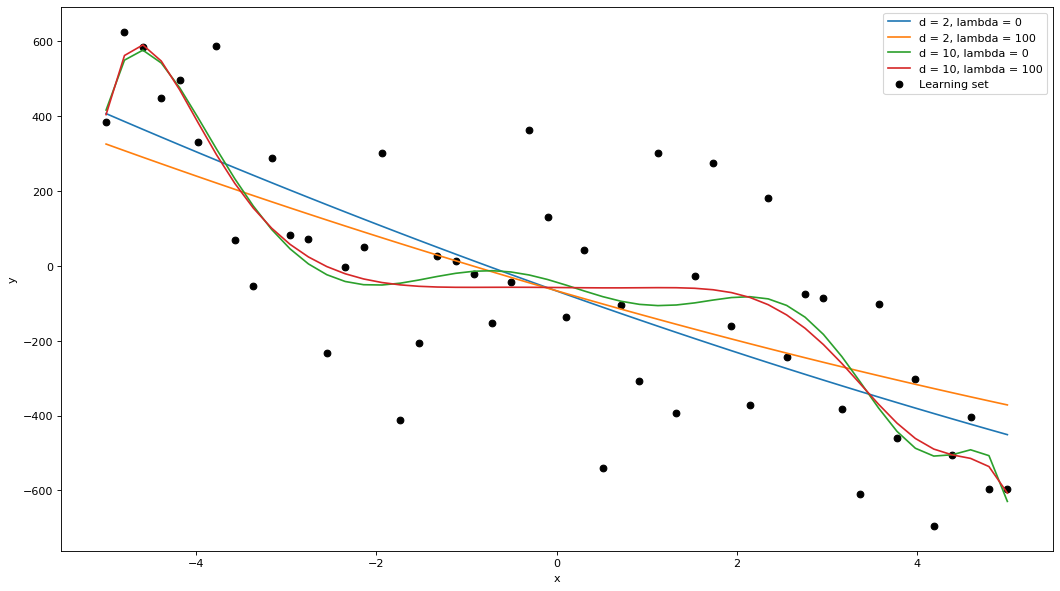

In [22]:
X = make_instances(-5, 5, 50)
y = make_labels(X, unknown_function, 200)

l_values = [0, 100]
d_values = [2, 10]

plt.figure(figsize=(16, 9), dpi=80)
plt.scatter(X, y, c='k', label="Learning set")

for d in d_values:
    poly = PolynomialFeatures(d)
    PHI = poly.fit_transform(X)
    
    for l in l_values:
        clf = Ridge(alpha=l)
        clf.fit(PHI, y)
        
        h = clf.predict(PHI)
        plt.plot(X, h, label="d = " + str(d) + ", lambda = " + str(l))
        
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

### (b)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


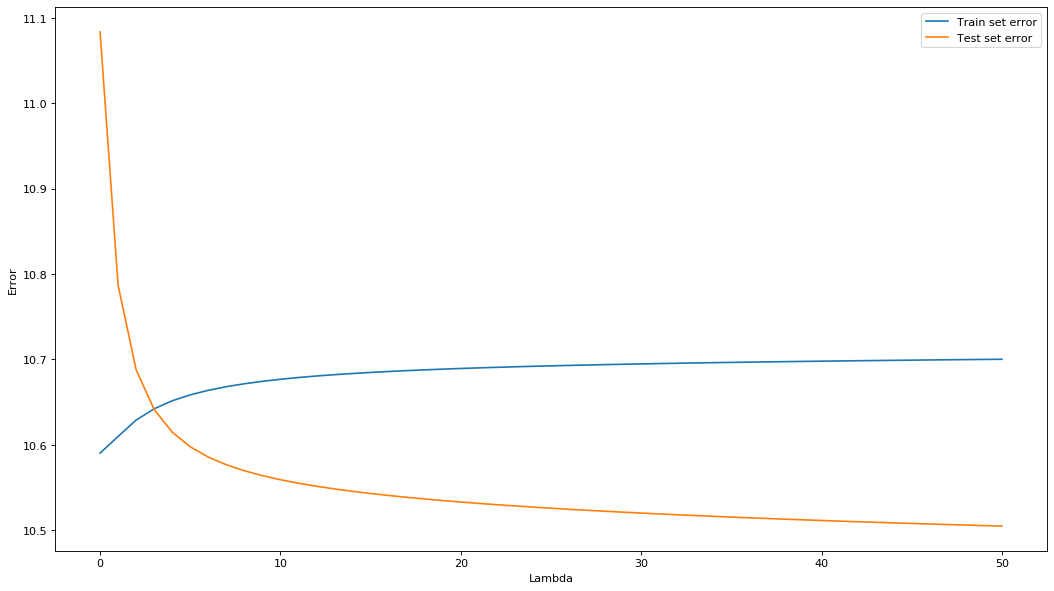

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

d = 10
l_values = np.arange(51)

poly = PolynomialFeatures(d)
PHI_train = poly.fit_transform(X_train)
PHI_test = poly.fit_transform(X_test)

errors_train = []
errors_test = []

plt.figure(figsize=(16, 9), dpi=80)

for l in l_values:
    clf = Ridge(alpha=l)
    clf.fit(PHI_train, y_train)

    h_train = clf.predict(PHI_train)
    errors_train.append(math.log(mean_squared_error(h_train, y_train)))
    
    h_test = clf.predict(PHI_test)
    errors_test.append(math.log(mean_squared_error(h_test, y_test)))

plt.plot(l_values, errors_train, label="Train set error")
plt.plot(l_values, errors_test, label="Test set error")
plt.xlabel("Lambda")
plt.ylabel("Error")
plt.legend()

### 6. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [24]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=10$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

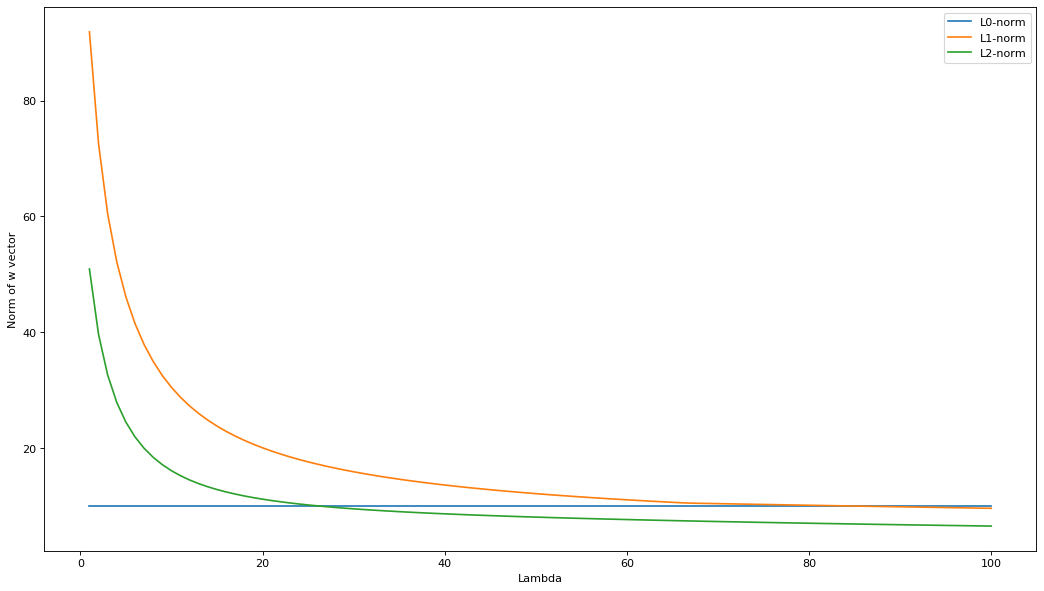

In [25]:
def calculate_l0_w_norm(w):
    return nonzeroes(w)

def calculate_l1_w_norm(w):
    norm = 0
    for weight in w:
        norm += abs(weight)
    return norm

def calculate_l2_w_norm(w):
    return math.sqrt(matmul(w, w.transpose()))

X = make_instances(-5, 5, 50)
y = make_labels(X, unknown_function, 200)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

d = 10
l_values = np.arange(1, 101)

l0_w_norms = []
l1_w_norms = []
l2_w_norms = []

poly = PolynomialFeatures(d)
PHI_train = poly.fit_transform(X_train)

for l in l_values:
    clf = Ridge(alpha=l)
    clf.fit(PHI_train, y_train)
    
    w = clf.coef_[0]
    l0_w_norms.append(calculate_l0_w_norm(w))
    l1_w_norms.append(calculate_l1_w_norm(w))
    l2_w_norms.append(calculate_l2_w_norm(w))
    
plt.figure(figsize=(16, 9), dpi=80)
plt.plot(l_values, l0_w_norms, label="L0-norm")
plt.plot(l_values, l1_w_norms, label="L1-norm")
plt.plot(l_values, l2_w_norms, label="L2-norm")
plt.xlabel("Lambda")
plt.ylabel("Norm of w vector")
plt.legend()

### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Zanemarite upozorenja.

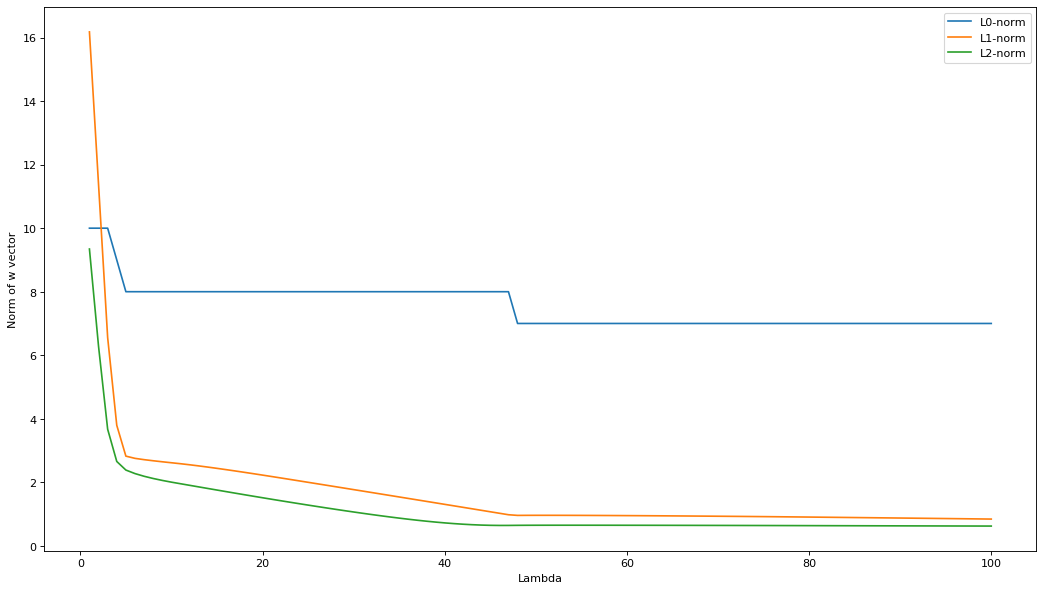

In [26]:
from sklearn.linear_model import Lasso

import warnings
warnings.filterwarnings('ignore')

l0_w_norms = []
l1_w_norms = []
l2_w_norms = []

for l in l_values:
    clf = Lasso(alpha=l)
    clf.fit(PHI_train, y_train)
    
    w = clf.coef_
    l0_w_norms.append(calculate_l0_w_norm(w))
    l1_w_norms.append(calculate_l1_w_norm(w))
    l2_w_norms.append(calculate_l2_w_norm(w))

plt.figure(figsize=(16, 9), dpi=80)
plt.plot(l_values, l0_w_norms, label="L0-norm")
plt.plot(l_values, l1_w_norms, label="L1-norm")
plt.plot(l_values, l2_w_norms, label="L2-norm")
plt.xlabel("Lambda")
plt.ylabel("Norm of w vector")
plt.legend()

### 7. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [27]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

**a)** Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

Text(0.5, 0, 'Grade')

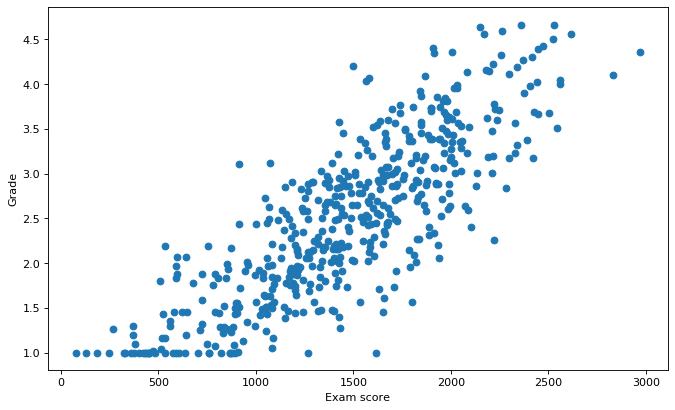

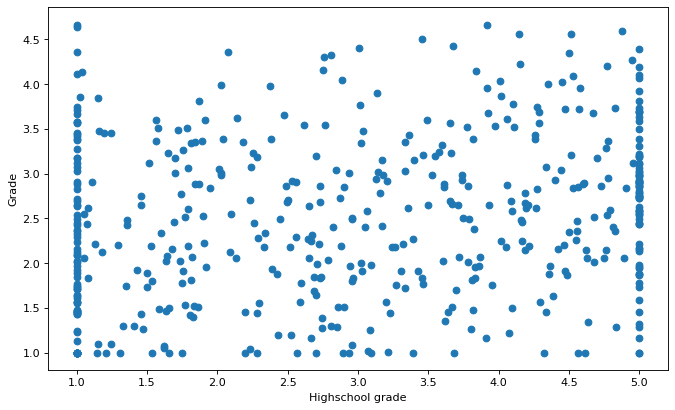

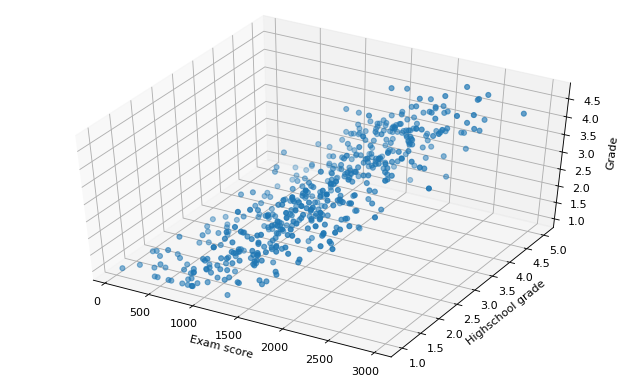

In [28]:
plt.figure(0, figsize=(10, 6), dpi=80)
plt.scatter(exam_score, grades_y)
plt.xlabel("Exam score")
plt.ylabel("Grade")

plt.figure(1, figsize=(10, 6), dpi=80)
plt.scatter(grade_in_highschool, grades_y)
plt.xlabel("Highschool grade")
plt.ylabel("Grade")

from mpl_toolkits import mplot3d

fig = plt.figure(2, figsize=(10, 6), dpi=80)
ax = plt.axes(projection='3d')
ax.view_init(45, -60)
ax.scatter(exam_score, grade_in_highschool, grades_y)
ax.set_xlabel("Exam score")
ax.set_ylabel("Highschool grade")
ax.set_zlabel("Grade")

**b)** Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

w:  0.15061179575776018 [0.00141497 0.09477276]


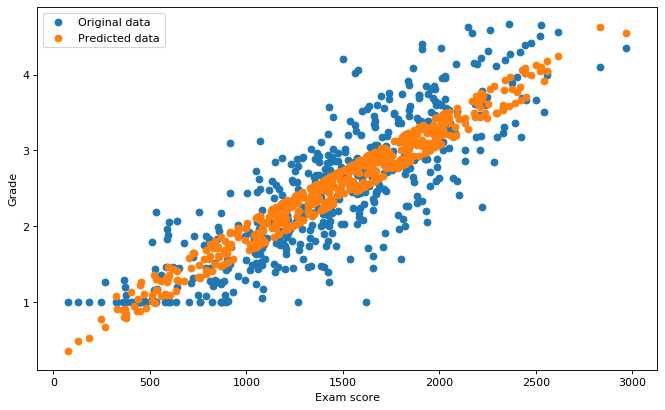

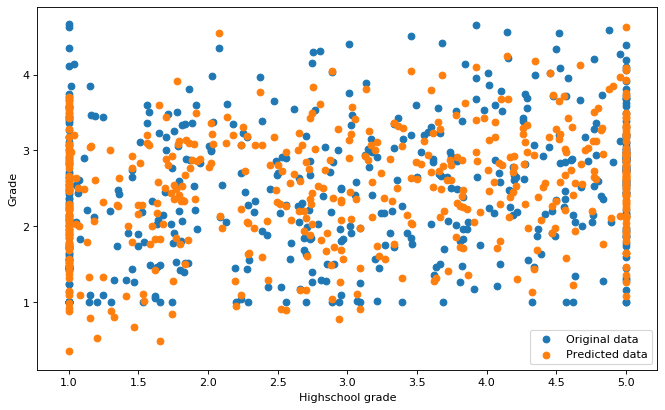

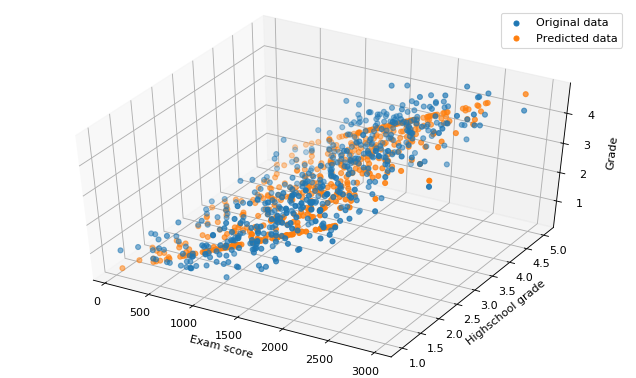

In [29]:
def plot_grades_all(grades_X, grades_y, h):
    exam_score = grades_X[:,0]
    grade_in_highschool = grades_X[:,1]
    
    plt.figure(0, figsize=(10, 6), dpi=80)
    plt.scatter(exam_score, grades_y, label="Original data")
    plt.scatter(exam_score, h, label="Predicted data")
    plt.xlabel("Exam score")
    plt.ylabel("Grade")
    plt.legend()

    plt.figure(1, figsize=(10, 6), dpi=80)
    plt.scatter(grade_in_highschool, grades_y, label="Original data")
    plt.scatter(grade_in_highschool, h, label="Predicted data")
    plt.xlabel("Highschool grade")
    plt.ylabel("Grade")
    plt.legend()

    fig = plt.figure(2, figsize=(10, 6), dpi=80)
    ax = plt.axes(projection='3d')
    ax.view_init(45, -60)
    ax.scatter(exam_score, grade_in_highschool, grades_y, label="Original data")
    ax.scatter(exam_score, grade_in_highschool, h, label="Predicted data")
    ax.set_xlabel("Exam score")
    ax.set_ylabel("Highschool grade")
    ax.set_zlabel("Grade")
    ax.legend()

l = 0.01

clf = Ridge(alpha=l)
clf.fit(grades_X, grades_y)
h = clf.predict(grades_X)

print("w: ", clf.intercept_, clf.coef_)
plot_grades_all(grades_X, grades_y, h)

Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [30]:
from sklearn.preprocessing import StandardScaler

w:  [8.62551331e-17] [[0.81630375 0.15167761]]


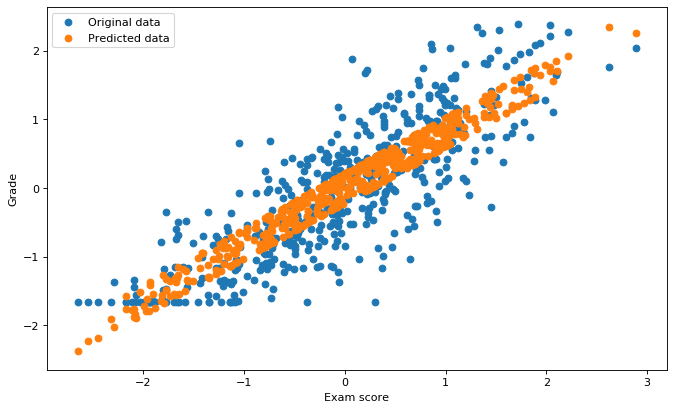

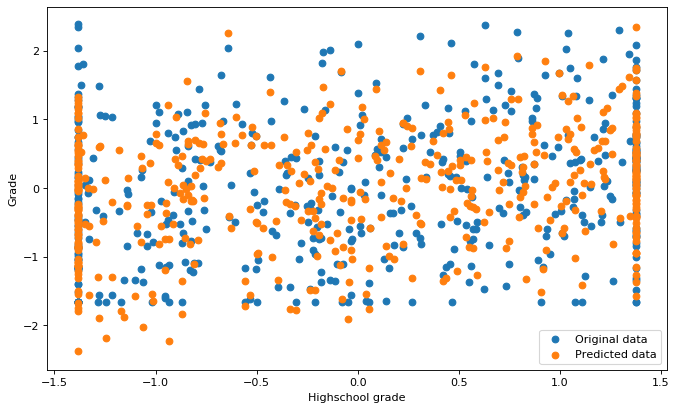

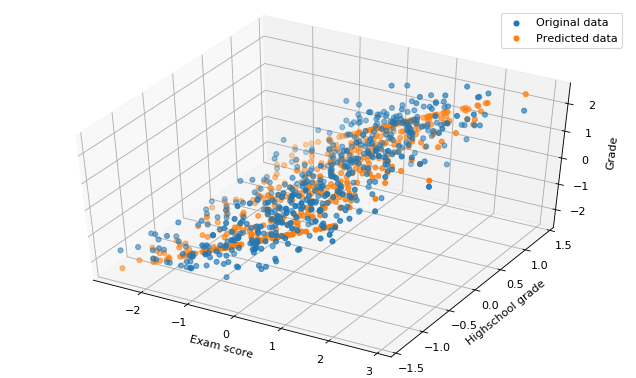

In [31]:
scaler = StandardScaler()

grades_X_fixed = scaler.fit_transform(grades_X)
grades_y_fixed = scaler.fit_transform(grades_y.reshape(-1, 1))

clf = Ridge(alpha=l)
clf.fit(grades_X_fixed, grades_y_fixed)
h = clf.predict(grades_X_fixed)

print("w: ", clf.intercept_, clf.coef_)
plot_grades_all(grades_X_fixed, grades_y_fixed, h)

**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 8. Multikolinearnost i kondicija matrice

**a)** Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [32]:
grades_X_fixed_colinear = np.insert(grades_X_fixed, 1, grades_X_fixed[:,1], axis=1)
print(grades_X_fixed_colinear)

[[ 0.95063817 -0.78607869 -0.78607869]
 [-0.50343434 -0.50193004 -0.50193004]
 [ 1.18596832 -0.52213172 -0.52213172]
 ...
 [-0.31593552  0.80074234  0.80074234]
 [ 0.81288393  1.24783236  1.24783236]
 [-0.01938126  1.21729714  1.21729714]]


Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

w:  [8.6255971e-17] [[0.81630364 0.07583957 0.07583957]]


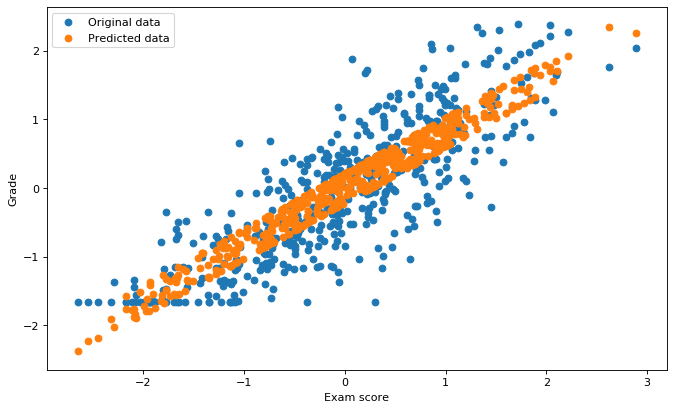

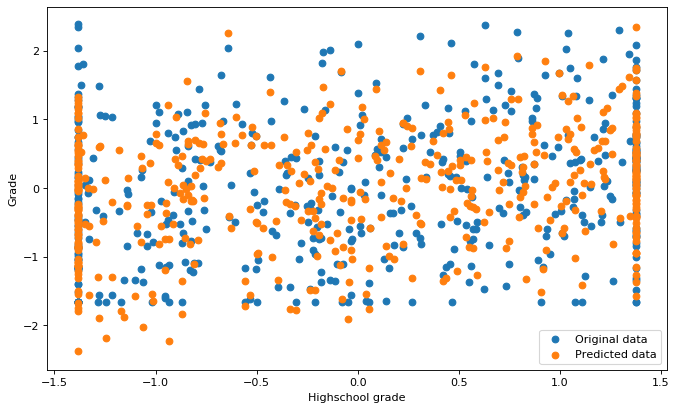

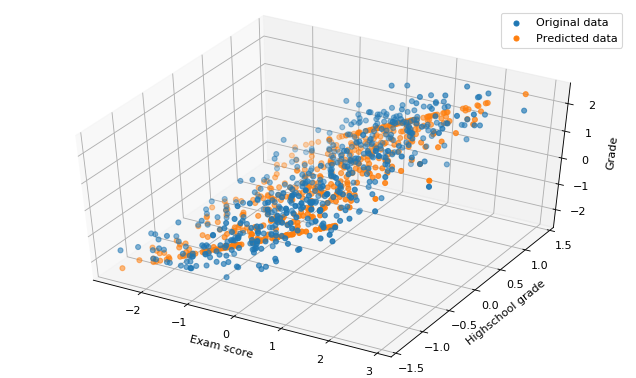

In [33]:
l = 0.01

clf = Ridge(alpha=l)
clf.fit(grades_X_fixed_colinear, grades_y_fixed)
h = clf.predict(grades_X_fixed_colinear)

print("w: ", clf.intercept_, clf.coef_)
plot_grades_all(grades_X_fixed, grades_y_fixed, h)

**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

**b)** Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [34]:
number_of_repeats = 10
l_values = [0.01, 1000]

clfs = []
for l in l_values:
    clfs.append(Ridge(alpha=l))
    
w_vectors_by_l = np.empty([len(l_values), number_of_repeats, len(clf.coef_[0])])

for repeat_i in range(number_of_repeats):
    half_X, _, half_y, _ = train_test_split(grades_X_fixed_colinear, grades_y_fixed, test_size=0.5)
    
    for clf_i in range(len(clfs)):
        clf = clfs[clf_i]
        clf.fit(half_X, half_y)
        w_vectors_by_l[clf_i][repeat_i] = clf.coef_[0]

for l_i in range(len(w_vectors_by_l)):
    print("lambda =", l_values[l_i])
    
    w_vectors = w_vectors_by_l[l_i]
    for w in w_vectors:
        print("w:", w)
        
    std_deviations = np.std(w_vectors, axis=0)
    print("stddevs:", std_deviations)

lambda = 0.01
w: [0.79385128 0.06504303 0.06504303]
w: [0.80739011 0.0761075  0.0761075 ]
w: [0.814158   0.07673386 0.07673386]
w: [0.83265053 0.07483515 0.07483515]
w: [0.79735626 0.08013669 0.08013669]
w: [0.81845427 0.04525193 0.04525193]
w: [0.80086373 0.0614553  0.0614553 ]
w: [0.81216485 0.06648337 0.06648337]
w: [0.81501911 0.04444567 0.04444567]
w: [0.81925961 0.07443972 0.07443972]
stddevs: [0.01102672 0.01216945 0.01216945]
lambda = 1000
w: [0.16436364 0.03812874 0.03812874]
w: [0.15992321 0.02415424 0.02415424]
w: [0.16128257 0.02717137 0.02717137]
w: [0.16579999 0.03405283 0.03405283]
w: [0.15703356 0.02664742 0.02664742]
w: [0.17833349 0.03188297 0.03188297]
w: [0.15563723 0.022474   0.022474  ]
w: [0.16174675 0.03077003 0.03077003]
w: [0.16591703 0.01772788 0.01772788]
w: [0.16617211 0.03087282 0.03087282]
stddevs: [0.00602766 0.00567524 0.00567524]


**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.

**c)** Koristeći [`numpy.linalg.cond`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.cond.html) izračunajte kondicijski broj matrice $\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I}$, gdje je $\mathbf{\Phi}$ matrica dizajna (`grades_X_fixed_colinear`). Ponovite i za $\lambda=0.01$ i za $\lambda=10$.


In [35]:
l_values = [0.01, 10]

PHI = grades_X_fixed_colinear
I = identity(len(PHI[0]))

for l in l_values:
    matrix = matmul(PHI.transpose(), PHI) + l * I
    condition_number = linalg.cond(matrix)
    print("lambda:", l, "condition number: ", condition_number)

lambda: 0.01 condition number:  100542.86653460482
lambda: 10 condition number:  101.54186653499362


**Q:** Kako regularizacija utječe na kondicijski broj matrice $\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I}$?  